In [1]:
import os 
import sys 
import pathlib 
path = pathlib.Path(os.getcwd())
module_path = str(path.parent) + '/'
sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymdp import utils


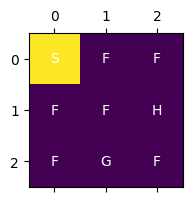

In [2]:
import gym

"""Automated context switching"""

map_context_1 = [
    'SFF',
    'FFH',
    'FGF']

map_context_2 = [
    'SFF',
    'FFG',
    'FHF']

map_context_1 = np.array([["S", "F", "F"], ["F", "F", "H"], ["F", "G", "F"]])
map_context_2 = np.array([["S", "F", "F"], ["F", "F", "G"], ["F", "H", "F"]])

grid_width = 3
grid_height = 3

def plot_grid(grid_width, grid_height, position = 0):

    grid = np.zeros((grid_width, grid_height))

    # grid[1,2] = 1
    # grid[2,1] = -1

    if position == 0:
        grid[0,0] += 2
    elif position == 1:
        grid[0,1] += 2
    elif position == 2:
        grid[0,2] += 2
    elif position == 3:
        grid[1,0] += 2
    elif position == 4:
        grid[1,1] += 2
    elif position == 5:
        grid[1,2] += 2
    elif position == 6:
        grid[2,0] += 2
    elif position == 7:
        grid[2,1] += 2
    elif position == 8:
        grid[2,2] += 2
    
    

    # Plotting the array with each grid labeled with integers, indexed at 0 (without the colorbar)
    fig, ax = plt.subplots(figsize = (2,2))
    cax = ax.matshow(grid, cmap='viridis')

    # Labeling each cell with the corresponding integer, adjusted for zero-indexing
    for (i, j), val in np.ndenumerate(map_context_1):
        ax.text(j, i, str(val ), ha='center', va='center', color='white')
    plt.show()

plot_grid(grid_width, grid_height)

In [3]:
""" Create variables for the storing the dimensionalities of the hidden states and the observations """
import itertools

#HIDDEN STATES
""" Create  the grid locations in the form of a list of (Y, X) tuples -- HINT: use itertools """
grid_location_states = list(itertools.product(range(grid_width), range(grid_height))) #hidden state
context_names = ['Goal-8', 'Goal-6'] #context 0 and context 1

print(f"grid_location_states: {grid_location_states}")
print(f" Length of grid_location_states: {len(grid_location_states)}")

""" Define `num_states` and `num_factors` below """
num_states = [len(grid_location_states), len(context_names)] #[9,2]
num_state_factors = len(num_states) #2 hidden state factors

location_action_names = ["UP", "RIGHT", "DOWN", "LEFT"] #, "STAY"]

context_action_names = ["Do-nothing"]
""" Define `num_controls` below """
num_controls = [len(location_action_names), len(context_action_names)] #num of actions

#OBSERVATIONS
grid_location_obs = list(itertools.product(range(grid_width), range(grid_height)))
score_obs = ["positive", "negative", "neutral"]

""" Define `num_obs` and `num_modalities` below """
num_obs = [len(grid_location_obs), len(score_obs)] # [9, 3]
num_modalities = len(num_obs) #2 observation modalities

grid_location_states: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
 Length of grid_location_states: 9


In [4]:
""" Generate the A array """
A = utils.obj_array( num_modalities )

A_location = np.zeros((len(grid_location_obs), len(grid_location_states), len(context_names))) #[observation modality, SF1, SF2]

for i in range(len(context_names)):
    A_location[:,:,i] = np.eye(len(grid_location_obs))

A[0] = A_location


A_score = np.zeros((len(score_obs), len(grid_location_states), len(context_names))) #[observation modality, SF1, SF2]

#for first context (Pos, Neg, Neutral)
A_score[:,:,0] = np.array([[0,0,1]] * 9).T #
A_score[:,7,0] = [1,0,0]
A_score[:,5,0] = [0,1,0]

#for second context
A_score[:,:,1] = np.array([[0,0,1]] * 9).T
A_score[:,5,1] = [1,0,0]
A_score[:,7,1] = [0,1,0]

A[1] = A_score

In [5]:
#Do we need to hardcode absorbing latent states in G and H?

#location_action_names = [ "UP", "DOWN", "LEFT", "RIGHT"] #actions we can take

#Initialize overall B

B = utils.obj_array(len(num_states))

#B[0]: State Factor 1: Location
#9x9x4: [len(location), len(location), len(actions)]
#depends on movement

B_grid_movement = np.zeros((len(grid_location_states), len(grid_location_states), len(location_action_names))) #[observation modality, SF1, SF2]
#For UP action
B_grid_movement[:,0,0] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,1,0] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,2,0] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,3,0] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,4,0] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,5,0] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,6,0] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,7,0] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,8,0] = [0,0,0,0,0,1,0,0,0]

#For DOWN action

B_grid_movement[:,0,2] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,1,2] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,2,2] = [0,0,0,0,0,1,0,0,0]
B_grid_movement[:,3,2] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,4,2] = [0,0,0,0,0,0,0,1,0]
B_grid_movement[:,5,2] = [0,0,0,0,0,0,0,0,1]
B_grid_movement[:,6,2] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,7,2] = [0,0,0,0,0,0,0,1,0]
B_grid_movement[:,8,2] = [0,0,0,0,0,0,0,0,1]

#For LEFT action

B_grid_movement[:,0,3] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,1,3] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,2,3] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,3,3] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,4,3] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,5,3] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,6,3] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,7,3] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,8,3] = [0,0,0,0,0,0,0,1,0]

#For RIGHT action

B_grid_movement[:,0,1] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,1,1] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,2,1] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,3,1] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,4,1] = [0,0,0,0,0,1,0,0,0]
B_grid_movement[:,5,1] = [0,0,0,0,0,1,0,0,0]
B_grid_movement[:,6,1] = [0,0,0,0,0,0,0,1,0]
B_grid_movement[:,7,1] = [0,0,0,0,0,0,0,0,1]
B_grid_movement[:,8,1] = [0,0,0,0,0,0,0,0,1]

B[0] = B_grid_movement

B_context = np.zeros((len(context_names), len(context_names), len(context_action_names)))

B_context[:,:,0] = np.eye(len(context_names))

B[1] = B_context


In [6]:
#Overall C
C = utils.obj_array( num_modalities )

#Preference over Observation Modality 1: Grid Locations [-4, 0, ... 0]
C[0] = np.array([-4, 0, 0, 0, 0, 0, 0, 0, 0]) #we prefer to not stay in the starting location

#Preference over Observation Modality 2: Scores [-4, 4, 0]
C[1] = np.array([4, -4, 0]) #we prefer the goal state, we negatively prefer the hole state, and are neutral else

In [7]:
#Overall D
D = utils.obj_array( num_state_factors )

#Prior over State Factor 1: Grid Locations: [1,0,0,0,0,0,0,0,0]
D[0] = np.array([1,0,0,0,0,0,0,0,0])

#Prior over State Factor 2: Context: Uniform [.5 .5]
D[1] = np.array([.5, .5])

In [8]:
num_modalities

2

In [9]:
num_states

[9, 2]

In [10]:
from pymdp.agent import Agent
policy_len = 3

zeta_single = 2.0 

zeta_modalities = [1,2]

zeta_modalities_and_states = utils.obj_array(num_modalities)
zeta_modalities_and_states[0] = np.random.uniform(0,1,size = (num_states[0], num_states[1]))
zeta_modalities_and_states[1] = np.random.uniform(0,1,size = (num_states[0], num_states[1]))

agent_zeta_single = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_zeta_prior= zeta_single) #policy length = number of actions in policies
agent_zeta_m = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_zeta_prior = zeta_modalities) #policy length = number of actions in policies
agent_zeta_ms = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_zeta_prior = zeta_modalities_and_states) #policy length = number of actions in policies

#tell the agent we are only

In [11]:
B[0].shape[1:]


(9, 4)

In [12]:

omega_single = 2.0

omega_factors = [1,2]

omega_modalities_and_states = utils.obj_array(2)
omega_modalities_and_states[0] = np.random.uniform(0,1,size = B[0].shape[1:]
)
omega_modalities_and_states[1] = np.random.uniform(0,1,size = B[1].shape[1:]
)


agent_omega_single = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior= omega_single) #policy length = number of actions in policies
agent_omega_f = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior = omega_factors) #policy length = number of actions in policies
agent_omega_fs = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior = omega_modalities_and_states) #policy length = number of actions in policies



In [13]:
agent_zeta_omega = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior = omega_modalities_and_states, beta_zeta_prior = zeta_modalities_and_states) #policy length = number of actions in policies




In [14]:
#Auxiliary function that takes in agent and outputs score ... Environment step function will have two step
def score_from_location(location):
  if location == 7:
    score = 0

  elif location == 5:
    score = 1

  else:
    score = 2

  return score

TIMESTEP: 0
Qs 0: 0
Qs 1: 0
next_action: DOWN
location_observation: 3
score_observation: 2


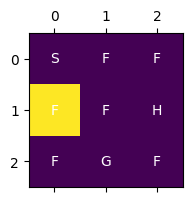

TIMESTEP: 1
Qs 0: 3
Qs 1: 0
next_action: RIGHT
location_observation: 4
score_observation: 2


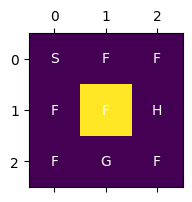

Omega: [array([[0.52305006, 0.87437962, 0.32129919, 0.93765968],
        [0.34417185, 0.97653709, 0.07349644, 0.76527895],
        [0.92208642, 0.67802583, 0.0032571 , 0.12633567],
        [0.79416934, 0.95572676, 0.06530825, 0.62710561],
        [0.24045255, 0.93544086, 0.54866183, 0.20385112],
        [0.2870527 , 0.84023256, 0.64301389, 0.0809418 ],
        [0.0968861 , 0.76904747, 0.97791099, 0.96484278],
        [0.64562658, 0.25089443, 0.76455066, 0.24736349],
        [0.6711184 , 0.3669064 , 0.19005291, 0.30274324]])
 array([[0.80058327],
        [0.92398857]])]
TIMESTEP: 2
Qs 0: 4
Qs 1: 0
next_action: DOWN
location_observation: 7
score_observation: 0


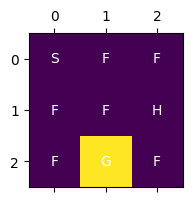

Omega: [array([[0.52305005, 0.87437961, 0.32129918, 0.93765967],
        [0.34417182, 0.97653706, 0.07349641, 0.76527893],
        [0.92208638, 0.67802579, 0.00325706, 0.12633564],
        [0.79416933, 0.95572675, 0.06530824, 0.6271056 ],
        [0.24045252, 0.93544084, 0.5486618 , 0.20385109],
        [0.28705254, 0.8402324 , 0.64301373, 0.08094164],
        [0.0968861 , 0.76904747, 0.97791099, 0.96484278],
        [0.64562655, 0.2508944 , 0.76455064, 0.24736347],
        [0.67111835, 0.36690636, 0.19005287, 0.3027432 ]])
 array([[0.80052802],
        [0.92412766]])]
TIMESTEP: 3
Qs 0: 7
Qs 1: 0
next_action: DOWN
location_observation: 7
score_observation: 0


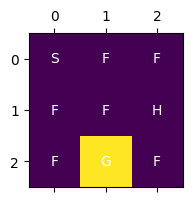

Omega: [array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
        [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
        [0.92208644, 0.67802585, 0.00325712, 0.12633569],
        [0.79416936, 0.95572677, 0.06530826, 0.62710562],
        [0.24045256, 0.93544087, 0.54866184, 0.20385113],
        [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
        [0.09688611, 0.76904748, 0.977911  , 0.96484279],
        [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
        [0.67111841, 0.36690641, 0.19005292, 0.30274326]])
 array([[4.22205251],
        [7.9269045 ]])]
TIMESTEP: 4
Qs 0: 7
Qs 1: 0
next_action: DOWN
location_observation: 7
score_observation: 0


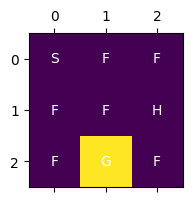

Omega: [array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
        [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
        [0.92208644, 0.67802585, 0.00325712, 0.12633569],
        [0.79416936, 0.95572677, 0.06530826, 0.62710562],
        [0.24045256, 0.93544087, 0.54866184, 0.20385113],
        [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
        [0.09688611, 0.76904748, 0.977911  , 0.96484279],
        [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
        [0.67111841, 0.36690641, 0.19005292, 0.30274326]])
 array([[0.80055119],
        [7.55069422]])]
TIMESTEP: 5
Qs 0: 7
Qs 1: 1
next_action: UP
location_observation: 4
score_observation: 2


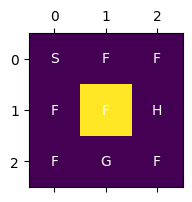

Omega: [array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
        [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
        [0.92208644, 0.67802585, 0.00325712, 0.12633569],
        [0.79416936, 0.95572677, 0.06530826, 0.62710562],
        [0.24045256, 0.93544087, 0.54866184, 0.20385113],
        [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
        [0.09688611, 0.76904748, 0.977911  , 0.96484279],
        [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
        [0.67111841, 0.36690641, 0.19005292, 0.30274326]])
 array([[0.80038381],
        [3.75165914]])]
TIMESTEP: 6
Qs 0: 4
Qs 1: 0
next_action: DOWN
location_observation: 7
score_observation: 0


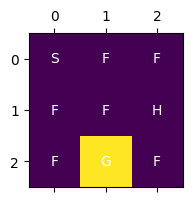

Omega: [array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
        [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
        [0.92208644, 0.67802585, 0.00325712, 0.12633569],
        [0.79416936, 0.95572677, 0.06530826, 0.62710562],
        [0.24045256, 0.93544087, 0.54866184, 0.20385113],
        [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
        [0.09688611, 0.76904748, 0.977911  , 0.96484279],
        [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
        [0.67111841, 0.36690641, 0.19005292, 0.30274326]])
 array([[0.84759246],
        [2.59234011]])]
TIMESTEP: 7
Qs 0: 7
Qs 1: 0
next_action: DOWN
location_observation: 7
score_observation: 0


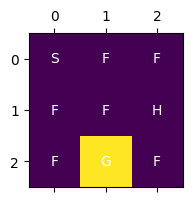

Omega: [array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
        [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
        [0.92208644, 0.67802585, 0.00325712, 0.12633569],
        [0.79416936, 0.95572677, 0.06530826, 0.62710562],
        [0.24045256, 0.93544087, 0.54866184, 0.20385113],
        [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
        [0.09688611, 0.76904748, 0.977911  , 0.96484279],
        [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
        [0.67111841, 0.36690641, 0.19005292, 0.30274326]])
 array([[0.82119742],
        [9.21438207]])]
TIMESTEP: 8
Qs 0: 7
Qs 1: 0
next_action: DOWN
location_observation: 7
score_observation: 0


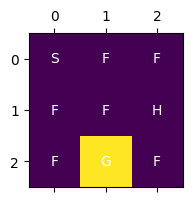

Omega: [array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
        [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
        [0.92208644, 0.67802585, 0.00325712, 0.12633569],
        [0.79416936, 0.95572677, 0.06530826, 0.62710562],
        [0.24045256, 0.93544087, 0.54866184, 0.20385113],
        [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
        [0.09688611, 0.76904748, 0.977911  , 0.96484279],
        [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
        [0.67111841, 0.36690641, 0.19005292, 0.30274326]])
 array([[ 0.80054947],
        [15.79870841]])]
TIMESTEP: 9
Qs 0: 7
Qs 1: 0
next_action: DOWN
location_observation: 7
score_observation: 0


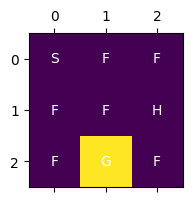

Omega: [array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
        [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
        [0.92208644, 0.67802585, 0.00325712, 0.12633569],
        [0.79416936, 0.95572677, 0.06530826, 0.62710562],
        [0.24045256, 0.93544087, 0.54866184, 0.20385113],
        [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
        [0.09688611, 0.76904748, 0.977911  , 0.96484279],
        [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
        [0.67111841, 0.36690641, 0.19005292, 0.30274326]])
 array([[ 0.80054947],
        [19.50552047]])]


In [15]:
#make sure whatever comes out of env is [list of indices] over observations and pass this to agent.infer_states
from pymdp.envs.grid_worlds import GridWorldEnv
from pymdp.learning import update_zeta, update_omega, update_gamma

env = GridWorldEnv(shape = [3,3], init_state=0)

T = 10


#agent = agent_omega_fs
agent = agent_zeta_omega


initial_location_observation = 0
initial_score_observation = score_from_location(initial_location_observation)
observation = [0, 2]



for t in range(T):
    print(f"TIMESTEP: {t}")

    qs = agent.infer_states(observation)
    print(f"Qs 0: {np.argmax(qs[0])}")
    print(f"Qs 1: {np.argmax(qs[1])}")

    q_pi, G = agent.infer_policies()
    next_action = agent.sample_action()
    next_action = int(next_action[0])
    print(f"next_action: {location_action_names[next_action]}")
    location_observation = env.step(next_action)
    print(f"location_observation: {location_observation}")
    score_observation = score_from_location(location_observation)
    print(f"score_observation: {score_observation}")
    observation = [location_observation, score_observation]

    
    plot_grid(grid_width, grid_height, location_observation)

    # agent.beta_zeta, agent.beta_zeta_prior = 
    # 
    # (observation, agent.A, agent.beta_zeta, agent.qs, agent.beta_zeta_prior, agent.A_factor_list, update_prior = False)
    # print(f"Zeta: {agent.beta_zeta}")

    if t > 0:

        agent.beta_omega, agent.beta_omega_prior = update_omega(q_pi, agent.qs_pi_policy, agent.qs_pi_policy_previous, B, agent.beta_omega, agent.beta_omega_prior, agent.policies, agent.B_factor_list)
        print(f"Omega: {agent.beta_omega}")

        agent.beta_zeta, agent.beta_zeta_prior = update_zeta(observation, agent.A, agent.beta_zeta, agent.qs, agent.beta_zeta_prior, agent.A_factor_list, update_prior = False)
        print(f"Zeta: {agent.beta_zeta}")
        agent.gamma = update_gamma(agent.G, agent.gamma, agent.q_pi, agent.policies)

        print(f"Gamma: {agent.gamma}")


In [16]:
agent.beta_omega

array([array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
              [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
              [0.92208644, 0.67802585, 0.00325712, 0.12633569],
              [0.79416936, 0.95572677, 0.06530826, 0.62710562],
              [0.24045256, 0.93544087, 0.54866184, 0.20385113],
              [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
              [0.09688611, 0.76904748, 0.977911  , 0.96484279],
              [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
              [0.67111841, 0.36690641, 0.19005292, 0.30274326]]),
       array([[ 0.80054947],
              [19.50552047]])], dtype=object)

In [17]:
agent.beta_omega_prior

array([array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
              [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
              [0.92208644, 0.67802585, 0.00325712, 0.12633569],
              [0.79416936, 0.95572677, 0.06530826, 0.62710562],
              [0.24045256, 0.93544087, 0.54866184, 0.20385113],
              [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
              [0.09688611, 0.76904748, 0.977911  , 0.96484279],
              [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
              [0.67111841, 0.36690641, 0.19005292, 0.30274326]]),
       array([[0.80054947],
              [0.92368254]])], dtype=object)

In [18]:
agent.beta_omega_prior[0]

array([[0.52305007, 0.87437963, 0.3212992 , 0.93765969],
       [0.34417186, 0.9765371 , 0.07349645, 0.76527896],
       [0.92208644, 0.67802585, 0.00325712, 0.12633569],
       [0.79416936, 0.95572677, 0.06530826, 0.62710562],
       [0.24045256, 0.93544087, 0.54866184, 0.20385113],
       [0.28705271, 0.84023257, 0.6430139 , 0.08094181],
       [0.09688611, 0.76904748, 0.977911  , 0.96484279],
       [0.64562659, 0.25089444, 0.76455067, 0.2473635 ],
       [0.67111841, 0.36690641, 0.19005292, 0.30274326]])

In [19]:
agent.q_pi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])